# Explore dataset

In [1]:
words = open("names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [2]:
len(words)

32033

In [3]:
# Min length of a word
min(len(w) for w in words)

2

In [4]:
# Max length of a word
max(len(w) for w in words)

15

# Bigram

Working with only two characters at a time

Look at one given character and predict next character

In [5]:
"""
Slide two characters at a time through each word
"""
for w in words[:2]:
    print(w)
    for ch1, ch2 in zip(w, w[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        print(ch1, ch2)

emma
e m
m m
m a
olivia
o l
l i
i v
v i
i a


In [6]:
"""
Slide two characters at a time through each word
"""
for w in words[:1]:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [7]:
"""
Slide two characters at a time through each word
"""
b = {} # Count dictionary for bigrams
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [8]:
sorted(b.items(), key = lambda kv: -kv[1]) # Reverse sort by count

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## Use PyTorch for Bigram Counts

- Create a 2D array for bigram counts instead of keeping them in a dictionary
- Rows will represent first characters
- Columns will represent second characters

In [9]:
import torch

In [10]:
a = torch.zeros((3, 5))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [11]:
a.dtype

torch.float32

In [12]:
# Let's convert dtype to int32 since we only deal with counts
a = torch.zeros((3, 5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [13]:
# NOTE: This is how to override brackets in Python

class Test:
    def __getitem__(self, val):
        print(val)
test = Test()
test[2, 3]

# ---

a[1, 3] = 1
a

(2, 3)


tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [14]:
a[1, 3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

### Create + Visualize 2D array bigram counts

In [15]:
"""
Create 2D array for bigram counts
"""
numLowercaseAlphabets = 26
extra = 2 # start and end special characters
totalChars = numLowercaseAlphabets + extra
N = torch.zeros((totalChars, totalChars), dtype=torch.int32)

In [16]:
# Create index for each characters
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi["<S>"] = totalChars-2
stoi["<E>"] = totalChars-1

In [17]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [18]:
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        N[idx1, idx2] += 1

In [19]:
# Reverse of stoi
# Given an integer, convert back to character
itos = {i:s for s, i in stoi.items()}

(-0.5, 27.5, 27.5, -0.5)

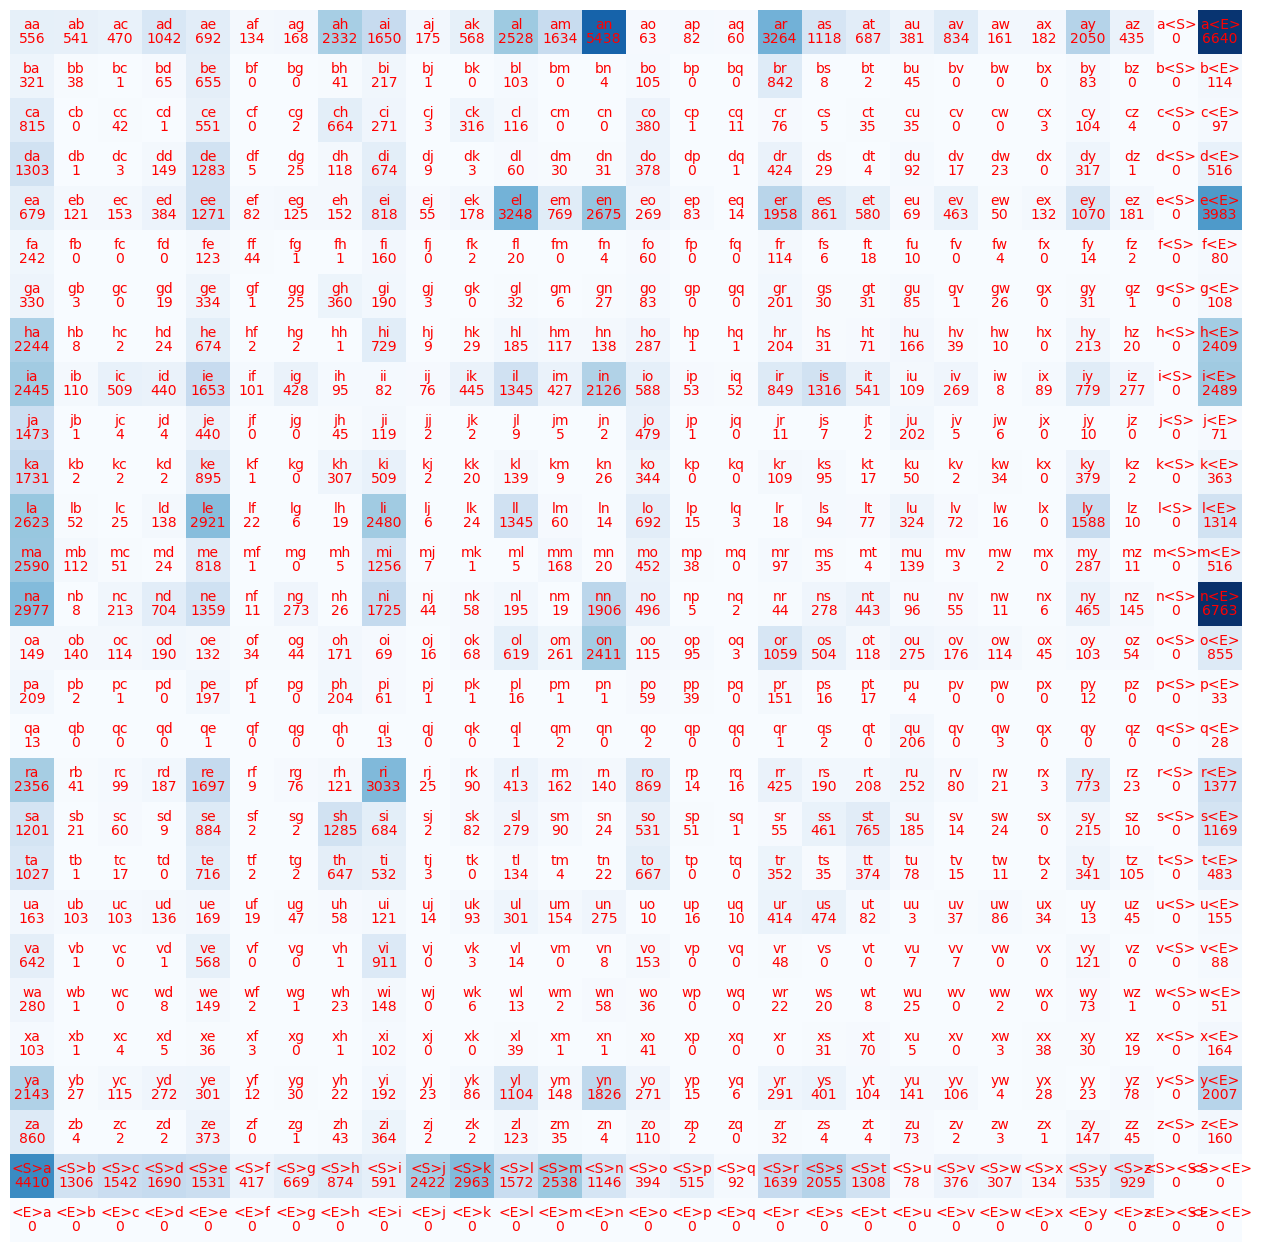

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for i in range(totalChars):
    for j in range(totalChars):
        chstr = itos[i] + itos[j] # The bigram for that i, j combination
        plt.text(j, i, chstr, ha='center', va='bottom', color='red') # (j, i) here since x-axis is column, y-axis is row
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='red') # N[i, j] is still a Tensor type, so we use item() to get data value

plt.axis('off')

### Remove S and E tokens in favor of new . character

We observe that we have a whole column (second to last column) that ends with S having all 0 counts

We also have the whole row (last row) that starts with E having all 0 counts

So we will optimize that with only 1 single character

- Optimize space

- But sacrifice information like explicit boundaries

---

But for this problem, we view each word separately, not as the whole corpus

=> So using a single special character is fine

Imagine looking at 'a.': We know for sure that it's the end, since we are not reading a paragraph so '.' cannot be start in this case

---

**NOTES:** These are my own reasonings (Tu's), not explained in the video

In [21]:
numLowercaseAlphabets = 26
extra = 1 # now only '.' character
totalChars = numLowercaseAlphabets + extra
N = torch.zeros((totalChars, totalChars), dtype=torch.int32)

# We put '.' at index 0, so every other character is offset by 1
# Just for display and pretty
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [22]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        N[idx1, idx2] += 1

(-0.5, 26.5, 26.5, -0.5)

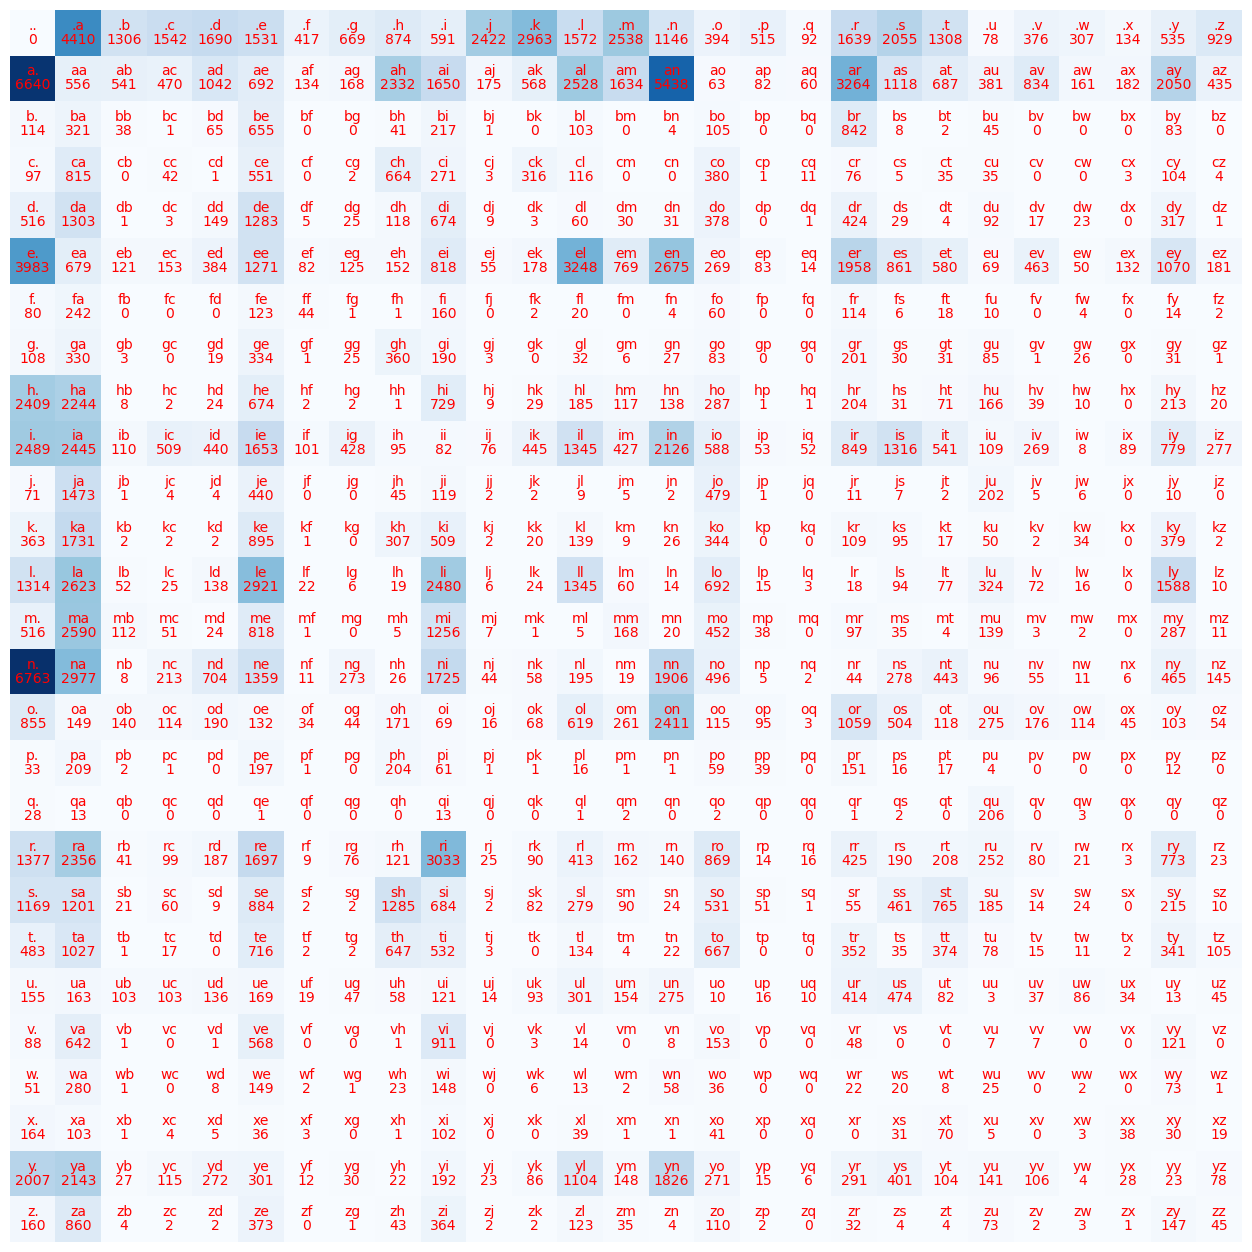

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for i in range(totalChars):
    for j in range(totalChars):
        chstr = itos[i] + itos[j] # The bigram for that i, j combination
        plt.text(j, i, chstr, ha='center', va='bottom', color='red') # j, i here since x is column, y is row
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='red') # N[i, j] is still a Tensor type, so we use item() to get data value

plt.axis('off')

In [24]:
# Equivalent to N[0]
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

### Create probabilities + Sample from the distribution

In [25]:
p = N[0].float() # Convert to float
print(p)

p = p / p.sum()
print(p)

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [26]:
"""
We will sample from the probability distribution above using PyTorch Multinomial
- Returns a tensor where each row contains num_samples indices sampled from the multinomial
- In other words, this will generate a sample of multiple indices of characters using our probability distribution

NOTE: To make the result deterministic (pseudo-random, same generated sequence across multiple runs), we will use PyTorch Generator
"""

# TEST
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
print(p)

# TEST
# Get samples from our distribution p
print(torch.multinomial(p, num_samples=20, replacement=True, generator=g))

tensor([0.7081, 0.3542, 0.1054])
tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])


In [27]:
# TEST
p = N[0].float()
p = p / p.sum()

g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([13, 19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,
         7, 19])

In [28]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0 # Index of current character we are considering
    while True:
        p = N[ix].float()
        p = p / p.sum()

        # Draw a single sample from the distribution
        # This is interesting since we don't want to pick the most likely character all the time
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        # If drawn index 0, then we view it as the end of our generated word and break
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [29]:
"""
Create a probability matrix instead of computing same things multiple times
"""

P = N.float()

# TEST

# https://pytorch.org/docs/stable/generated/torch.sum.html
# Add all rows in each column -> Original matrix [27, 27] will result in a 2D matrix of size [1, 27]
test = P.sum(dim=0, keepdim=True)
print(test)
print(test.shape)
print()

# If not keep dim, then that dimension 0th will be squeezed out (removed) -> So we get a 1D vector of length 27
test = P.sum(dim=0, keepdim=False)
print(test)
print(test.shape)
print()

# Create probalitity matrix

P = N.float()

# This divison will create a new tensor, so that's not efficient
# P = P / P.sum(dim=1, keepdim=True) 

P /= P.sum(dim=1, keepdim=True) # We prefer in-place operation whenever possible

"""
Can we do division [27, 27] matrix by [27, 1]?
- The answer to that is broadcasting rule
- Read https://pytorch.org/docs/stable/notes/broadcasting.html

What it really does in this case is that it takes the dimension 1 and stretch it out (copy) to match 27
- So basically it copies the sum of each row and and clone it out to other 26 columns

I believe the mechanism of how this works is that it will start cloning from the trailing dimension first
- Clone the smaller dimension to match the larger dimension
- Keep cloning until all dimensions are the same
"""

# TEST
a1 = torch.zeros(1, 2, 1)
print(a1)
print()

a2 = torch.ones(2, 1, 2)
print(a2)
print()

a3 = a1 + a2 # a3 has size (2, 2, 2)
print(a3)
print()

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])
torch.Size([1, 27])

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])
torch.Size([27])

tensor([[[0.],
         [0.]]])

tensor([[[1., 1.]],

        [[1., 1.]]])

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])



In [30]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0 # Index of current character we are considering
    while True:
        p = P[ix]

        # Draw a single sample from the distribution
        # This is interesting since we don't want to pick the most likely character all the time
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        # If drawn index 0, then we view it as the end of our generated word and break
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


# Evaluation

In [31]:
# Test print the first three words and their bigrams' probabilities

for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        prob = P[idx1, idx2]
        print(f'{ch1}{ch2}: {prob:.4f}')

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960


## Maximum Likelihood Estimation

If all bigrams are equally likely, the probability is:
- 1/27 = 4%

=> So any bigram probabilities in our matrix more than 4% means our trained model learned something useful

=> If the probabilities are near 1, then that's good because the model can probably predict what comes next

---

To summarize all the probabilities in our model, we use Maximum Likelihood Estimation

- https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

- Example: https://brilliant.org/wiki/maximum-likelihood-estimation-mle/

---

**Likelihood function is the product of all observations given the parameters**

In this case:

- **Parameters** = bigram matrix

- **Observations** = training set = words

- Tell us the probability of the entire dataset assigned by the model that we've trained

- The probability to get a word is multiplying all probabilities of bigrams constructing that word

Since taking the product of all probabilities can be very SMALL, we usually use Log Likelihood

- log(a*b*c) = log(a) + log(b) + log(c)

In [32]:
# Test print the first three words, their bigrams' probabilities, and log probabilities

"""
The log of probability will go from (-inf, 0) for probability from (0, 1)
But for loss function, we want to minimize loss
=> We will take the negative of log likelihood

For convenience, people usually take average instead of simple sum
"""

log_likelihood = 0.0
n = 0

for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        prob = P[idx1, idx2]
        
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}') # This is ultimately the quality of our model. If it's small -> model good. Else -> model not good

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)
nll/n=tensor(2.4241)


## Summary

- GOAL: maximize likelihood of the data with respect to model parameters (statistical modeling) (our table in this case)

- Equivalent to maximize the log likelihood (because log is monotonic)

- Equivalent to minimize negative log likelihood

- Equivalent to minimize average negative log likelihood

# Model Smoothing

Since the count for some bigrams can be 0, log(0) is -inf which makes negative likelihood to be inf.

We don't really want this.

One simple trick to smoothen the likelihood is to plus 1 to all the counts of bigrams.

In [33]:
"""
NOTE: 
- The more you add, the more uniform the model will be
- The less you add, the more peak the model will be
"""
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True)

# Alternative approach: Use neural network to predict the next character

Input: A single character
Output: A probability distribution of all possible next characters

In [34]:
# Create a training set of bigrams (x, y)
# xs: input, ys: target
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        print(ch1, ch2)
        xs.append(idx1)
        ys.append(idx2)

# IMPORTANT NOTE:
# https://stackoverflow.com/questions/51911749/what-is-the-difference-between-torch-tensor-and-torch-tensor
# Effectively, it's recommended to use torch.tensor because it will infer data types for us
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [35]:
xs

tensor([ 0,  5, 13, 13,  1])

In [36]:
ys

tensor([ 5, 13, 13,  1,  0])

In [37]:
"""
We don't usually throw a single integer value directly into the neural net
We often normalize the integer input first
One common way is to do one-hot encoding
"""

# https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html
import torch.nn.functional as F

# We want to cast to float() so that we can feed into the neural net
# Neural net deals with probability and floating points a lot, so it's convenient and less buggy to just turn input into float
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
xenc.shape

torch.Size([5, 27])

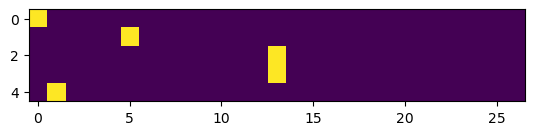

In [39]:
plt.imshow(xenc)

In [40]:
# NOTE: To make the result deterministic (pseudo-random, same generated sequence across multiple runs), we will use PyTorch Generator
g = torch.Generator().manual_seed(2147483647)

# Random weights from a normal distribution
W = torch.randn((27, 1), generator=g)
W

tensor([[ 1.5674],
        [-0.2373],
        [-0.0274],
        [-1.1008],
        [ 0.2859],
        [-0.0296],
        [-1.5471],
        [ 0.6049],
        [ 0.0791],
        [ 0.9046],
        [-0.4713],
        [-0.7389],
        [ 1.7249],
        [ 0.0380],
        [-1.0694],
        [-0.5374],
        [ 0.0511],
        [ 1.3095],
        [-0.8022],
        [ 1.1500],
        [-0.9643],
        [-0.8815],
        [-0.8295],
        [-0.2548],
        [-0.9648],
        [-0.2321],
        [-0.3476]])

In [41]:
# https://stackoverflow.com/questions/60080997/pytorch-porting-operator
# @ is matrix multiplication in PyTorch
xenc @ W

tensor([[ 1.5674],
        [-0.0296],
        [ 0.0380],
        [ 0.0380],
        [-0.2373]])

In [42]:
torch.matmul(xenc, W)

tensor([[ 1.5674],
        [-0.0296],
        [ 0.0380],
        [ 0.0380],
        [-0.2373]])

In [43]:
"""
So xenc @ W is when you feed 5 examples simultaneously into the neural net of one neuron
Each example contains 27 inputs (one-hot encoding)
In return, you have the 5 different outputs for 5 examples from this neural net of one neuron

NOW:
- We want to have a hidden layer of 27 neurons instead of just 1
"""

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g) # IMPORTANT: Each column ith is the 27 weights (matched 27 one-hot inputs) for neuron ith

# Size = (5, 27) * (27, 27) -> output size (5, 27)
xenc @ W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [44]:
(xenc @ W).shape

torch.Size([5, 27])

In [45]:
(xenc @ W)[3, 13] # This is the dot product of 3rd example vector (row) with the 13th neuron weight vector (column)

tensor(0.0379)

In [46]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
W[:, 13] # 13th column

tensor([-4.3297e-01, -9.6478e-01,  2.1346e+00, -7.2759e-01, -1.3753e-01,
        -1.3132e-03, -3.1566e-01,  1.1199e+00, -4.7701e-01, -1.5065e+00,
         1.2108e+00, -4.0636e-01,  1.9110e-01,  3.7882e-02,  1.3431e+00,
         2.4311e-01, -1.5364e-01, -1.1583e+00,  1.1614e+00,  4.2016e-01,
         2.7359e-01,  3.6583e-01,  1.7128e+00,  1.3769e+00, -8.9778e-01,
        -9.5177e-01,  1.4723e-01])

In [48]:
torch.dot(xenc[3], W[:, 13])

tensor(0.0379)

In [49]:
# (27) * (27) -> element-wise multiplication
(xenc[3] * W[:, 13]).sum()

tensor(0.0379)

## Normalize output of simple neural net

Since outputs now can be negative or position, we **interpret (view)** that as LOG of bigram counts (for all possible next character) given the first character is input (one-hot encoding)

So to get the count, we will take EXPONENTIAL of the current outputs

In [50]:
(xenc @ W)

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [51]:
(xenc @ W).exp()

tensor([[ 4.7940,  0.7888,  0.9730,  0.3326,  1.3309,  0.9708,  0.2129,  1.8311,
          1.0824,  2.4710,  0.6242,  2.1964,  0.7200,  0.6486,  3.9469, 18.7908,
          4.7673,  0.1967,  1.9683,  0.4315,  2.6775,  0.8621,  0.2277,  1.5656,
          0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  2.8830, 11.0032,  1.5972,  0.5187,  1.8527,
          0.5369,  1.6654,  3.8818,  1.2642,  0.6339,  0.9987,  0.5995,  1.7432,
          1.6073,  0.2499,  5.0680,  1.1876,  2.6871,  1.6596,  2.7728,  0.1486,
          0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373,
          2.2763,  0.4719,  2.5289,  0.2265,  0.8082,  0.3054,  0.5164,  0.7918,
          4.6866,  1.8232,  0.4921],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373

In [52]:
"""
INTERESTING NOTE:
- After looking at the code below to transform outputs into probabilities
- It's exactly the same as in the softmax formula
- softmax = e^zi / sum_j (e^zj)
"""

logits = xenc @ W # log-counts

# 2 lines below are equivalent to softmax activation function
counts = logits.exp() # kind of equivalent to the counts in matrix N in previous parts
probs = counts / counts.sum(dim=1, keepdim=True) # Normalize counts into probabilities (explained in previous parts)

probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [53]:
probs[0].sum()

tensor(1.0000)

In [54]:
probs.shape

torch.Size([5, 27])

In [55]:
print("Input character:", itos[xs[0].item()])
print("Probability distribution of next characters:")
print(probs[0])

Input character: .
Probability distribution of next characters:
tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])


In [56]:
"""
Visualize
"""

nlls = torch.zeros(5)
for example in range(5):
    x = xs[example].item() # Input character index
    y = ys[example].item() # Label (target) character index
    print('--- --- ---')
    print(f'bigram example {example+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net', x)
    print('output probabilities from the neural net:', probs[example])
    print('label (actual next character):', y)
    p = probs[example, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[example] = nll

print('=== === ===')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())

--- --- ---
bigram example 1: .e (indexes 0, 5)
input to the neural net 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--- --- ---
bigram example 2: em (indexes 5, 13)
input to the neural net 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0.01

## Optimization for neural net with loss and backpropagation

This process is exactly the same as with micrograd.

Except we use negative log likelihood instead of square error

Mean square error is used for regression

Negative log likelihood can be used for classification

```python
for step in range(20):
    # forward pass
    ypred = [net(x) for x in xs] # Feed each example into the neural net
    loss: "Value" = sum((y_out - y_ground_truth)**2 for y_ground_truth, y_out in zip(ys, ypred))

    # zero grad
    # Because after a backward pass and update value for weights and biases
    # We need to reset the gradient for the next training iteration, or else our gradient will add up due to '+=' in our derivative formula
    for p in net.parameters():
        p.grad = 0.0

    # backward pass
    loss.backward()

    # gradient descent
    for p in net.parameters():
        p.data += -0.05 * p.grad

    print(step, loss.data)
```

In [57]:
xs

tensor([ 0,  5, 13, 13,  1])

In [58]:
ys

tensor([ 5, 13, 13,  1,  0])

In [69]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # NOTE: Need requires_grad here, by default it's False

In [70]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

In [71]:
# probs[example ith, probability of the correct label (target)]
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [72]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [73]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [74]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [75]:
# forward pass with loss
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [76]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()


In [77]:
# NOTE: Each element in W.grad shows us the influence of that weight on the loss value
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [78]:
W.shape

torch.Size([27, 27])

In [79]:
W.grad.shape

torch.Size([27, 27])

In [80]:
# Update
W.data += -0.1 * W.grad

In [81]:
"""
Everything so far in one code
"""

'\nEverything so far in one code\n'

In [88]:
# create dataset
xs, ys = [], []

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples: 228146


In [91]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

3.749866247177124
3.3659558296203613
3.150949478149414
3.0182971954345703
2.9262173175811768
2.8592920303344727
2.808872938156128
2.769418478012085
2.7375104427337646
2.7110233306884766
2.688599109649658
2.6693389415740967
2.65262508392334
2.638009786605835
2.6251518726348877
2.613780975341797
2.6036765575408936
2.5946545600891113
2.586561441421509
2.579267740249634
2.5726656913757324
2.5666637420654297
2.561185121536255
2.556164026260376
2.551546573638916
2.547285318374634
2.5433409214019775
2.5396792888641357
2.5362720489501953
2.5330939292907715
2.5301241874694824
2.52734375
2.5247364044189453
2.5222878456115723
2.5199849605560303
2.5178165435791016
2.5157718658447266
2.513841390609741
2.512017250061035
2.5102908611297607
2.508655548095703
2.5071051120758057
2.5056328773498535
2.5042343139648438
2.502903461456299
2.501636505126953
2.5004289150238037
2.4992763996124268
2.498176336288452
2.497124671936035
2.4961180686950684
2.495154857635498
2.4942314624786377
2.4933464527130127
2.492

In [90]:
"""
NOTE: 

If we train this neural net multiple times:
- We expect the loss to be around 2.4241 (as in nll/n of pure bigram model in previous parts)

But we will make our neural net more complex in later chapters, and its loss might go even lower (better) than the bigram model

The neural network is much more flexible and scalable compared to the bigram model since:
- If we scale bigram model longer sequences, the table would grow very large
"""

'\nNOTE: \n\nIf we train this neural net multiple times:\n- We expect the loss to be around 2.4241 (as in nll/n of pure bigram model in previous parts)\n\nBut we will make our neural net more complex now, and its loss might go even lower (better) than the bigram model\n\nThe neural network is much more flexible and scalable compared to the bigram model since:\n- If we scale bigram model longer sequences, the table would grow very large\n'

# Interesting Takeaways

## 1. One-hot encoding really just selects a row of the next Linear layer's weight matrix

Because of dot product between row and column during matrix multiplication:
- One-hot vector will essentially result in only the cell with value == 1

This is the **SAME** as when we use current character index to select the row in the bigram table count in previous parts
- This row gives us the probability distribution for next character

=> The W matrix is literally the same as the N matrix

---

But W represents the log counts instead of the counts

And W is not filled manually like N

Rather, we fill W with the guiding of loss function

## 2. Model smoothing as regularization loss

In the old bigram model, we did:

```python
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True)
```

If we plus with a very large number, our probability distribution will eventually become uniform since the numbers will become same-same

---

**The gradient-based framework has something similar for smoothing**

If all entries in W are 0, then the logits will all be 0

Then the counts will all be 1 (since it's exponential of logits)

Then the probs will become uniform probability distribution

=> If we want to smooth out the prob distribution, we want to nudge W towards 0

This can be achieved by adding 1 more term into the loss function:

```python
smooth_rate = 0.1
normalize_W = (W ** 2).mean() # Normalize to eliminate negative sign and turn W matrix into a single value
loss = -probs[torch.arange(num), ys].log().mean() + smooth_rate * normalize_W
```

=> Making smooth_rate will encourage loss to minimize W matrix more

As a result, increasing smooth_rate will make probs more uniform

---

This approach is called **regularization loss**

- In this case, loss wants to match up the probability distribution with our training data

- But at the same time, loss wants to smooth out the probability distribution

# Sample from our simple 'neural net'

In [92]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0

    while True:
        """
        Before
        p = P[ix]
        """

        # Now
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(dim=1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix == 0:
            break

    print(''.join(out))

mor.
axwaninaymoryles.
kondmaisah.
anchshizarie.
odaren.
